# PROJECT PART 1 - REGRESSION

Professor: Patrick Waelbroeck

Students:

- Gabriel de Souza Oliva
- Isabella de Melo Sousa

Date: 22/11/2020

This contains both the code and the text answers to the questions of the project.

## 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f

In [ ]:
df = pd.read_csv('MROZ.txt', delim_whitespace=True, header=None )
df.columns = ['inlf', 'hours', 'kidslt6', 'kidsge6', 'age', 'educ', 'wage', 'repwage', 'hushrs','husage','huseduc','huswage','faminc',
          'mtr','motheduc','fatheduc','unem','city','exper','nwifeinc','lwage','expersq']
df["wage"] = pd.to_numeric(df.wage, errors='coerce')
df["lwage"] = pd.to_numeric(df.lwage, errors='coerce')
df = df.dropna()
df = df.drop(df[df.wage <= 0].index)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      428 non-null    int64  
 1   hours     428 non-null    int64  
 2   kidslt6   428 non-null    int64  
 3   kidsge6   428 non-null    int64  
 4   age       428 non-null    int64  
 5   educ      428 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   428 non-null    float64
 8   hushrs    428 non-null    int64  
 9   husage    428 non-null    int64  
 10  huseduc   428 non-null    int64  
 11  huswage   428 non-null    float64
 12  faminc    428 non-null    int64  
 13  mtr       428 non-null    float64
 14  motheduc  428 non-null    int64  
 15  fatheduc  428 non-null    int64  
 16  unem      428 non-null    float64
 17  city      428 non-null    int64  
 18  exper     428 non-null    int64  
 19  nwifeinc  428 non-null    float64
 20  lwage     428 non-null    float6

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,0.838026,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


##### Above we can observe the dataframe after importing the data, change wage and lwage types to float64 and drop the observations in which wage is not strictly positive.

## 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

##### all the women

In [ ]:
fields = ['wage', 'age', 'educ']
df[fields].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


##### women whose husband's salary is greater than the sample median

In [ ]:
df_fields = df[fields]
df_fields[df['huswage'] > df['wage'].median()]. describe()

,wage,age,educ
count,380.000000,380.000000,380.000000
mean,4.209165,41.973684,12.684211
std,3.335807,7.674743,2.299538
min,0.128200,30.000000,5.000000
25%,2.274725,35.000000,12.000000
50%,3.566500,43.000000,12.000000
75%,5.089100,47.000000,14.000000
max,25.000000,60.000000,17.000000


#### women whose husband's salary is lower than the sample median

In [ ]:
df_fields[df['huswage'] < df['wage'].median()]. describe()

,wage,age,educ
count,48.000000,48.000000,48.000000
mean,3.928438,41.958333,12.458333
std,3.122774,8.163120,2.182701
min,1.201900,30.000000,8.000000
25%,2.135750,35.000000,11.750000
50%,2.945800,40.500000,12.000000
75%,4.352375,49.250000,14.000000
max,18.267000,59.000000,16.000000


## 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

Text(0.5, 1.0, 'Histogram of wage')

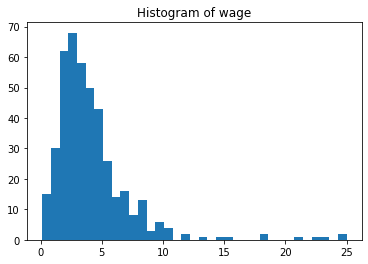

In [ ]:
plt.hist(df['wage'],'auto')
plt.title('Histogram of wage')

Text(0.5, 1.0, 'Histogram of log(wage)')

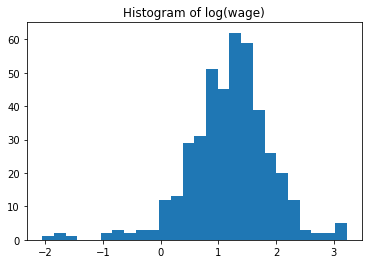

In [ ]:
plt.hist(df['lwage'],'auto')
plt.title('Histogram of log(wage)')

##### We can observe that the wage's histogram is more close to a exponential distribution while the log(wage)'s histogram is more close to a normal distribution. 

## 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [ ]:
motheduc = df['motheduc']
fatheduc = df['fatheduc']
np.corrcoef(motheduc,fatheduc)

array([[1.        , 0.55406322],
       [0.55406322, 1.        ]])

#### Yes, multicollinearity is the high (but not perfect) correlation between two or more independent variables and that is exactly the case above in which its possible to see a high correlation of 0.55406322 between motheduc and fatheduc.

## 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"


In [ ]:
wage = df['wage']
educ = df['educ']
exper = df['exper']

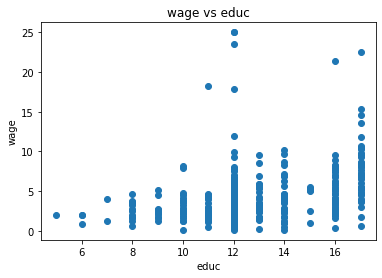

In [ ]:
plt.scatter(educ,wage)
plt.xlabel('educ')
plt.ylabel('wage')
plt.title('wage vs educ')
plt.show()

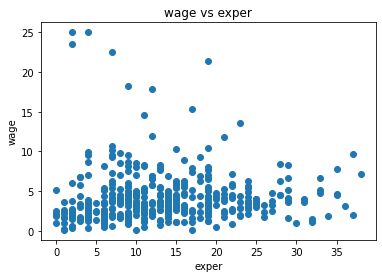

In [ ]:
plt.scatter(exper,wage)
plt.xlabel('exper')
plt.ylabel('wage')
plt.title('wage vs exper')
plt.show()

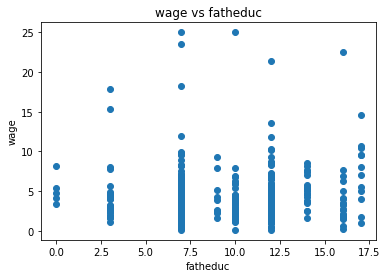

In [ ]:
plt.scatter(fatheduc,wage)
plt.xlabel('fatheduc')
plt.ylabel('wage')
plt.title('wage vs fatheduc')
plt.show()

#### S'agit-il d'un effet "toute chose étant égale par ailleurs ?" The notion of ceteris paribus—which means “other (relevant) factors being equal”

#### No, the ceteris paribus is not respected because there is correlation between the variables (exper and educ, for example, as we can see below) and therefore the parameters have influence on each other.

In [ ]:
np.corrcoef(exper,educ)

array([[ 1.        , -0.01520617],
       [-0.01520617,  1.        ]])

## 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise

- The fundamental hypothesis for assuring the unbiasedness of the estimateurs consists in four assumptions: MLR is linear in parameters ; random sampling ; no perfect collinearity and zero conditional mean, $E(u|x_1, x_2, ..., x_k) = 0$.

- Omitted variable bias is the bias in the OLS estimator that arises when the regressor, X, is correlated with an omitted variable. For that to occur, two conditions must be fulfilled:

  1) X is correlated with the omitted variable;
  
  2) The omitted variable is a determinant of the dependent variable Y.

### 7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

wage = $\beta_{city}*city$ + $\beta_{educ}*educ$ + $\beta_{exper}*exper$ + $\beta_{nwifeinc}*nwifeinc$ + $\beta_{kidslt6}*kidslt6$ + $\beta_{kidsge6}*kidsge6$ + $\beta_{const}$

In [ ]:
# building the linear model for wage
y = df['wage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

In [ ]:
# regression using statsmodel
model=sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.41e-10
Time:                        22:40:43   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4035      0.963     -2.495      0.013      -4.297      -0.510
x1             0.3698      0.327      1.132      0.258      -0.272       1.012
x2             0.4600      0.070      6.546      0.000       0.322       0.598
x3             0.0238      0.021      1.141      0.255      -0.017       0.065
x4             0.0152      0.015      0.984      0.326      -0.015       0.046
x5             0.0362      0.397      0.091      0.927      -0.744       0.816
x6            -0.0619      0.125     -0.494      0.622      -0.308       0.185
==============================================================================
Omnibus:                      345.825   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6499.375
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                      20.847   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

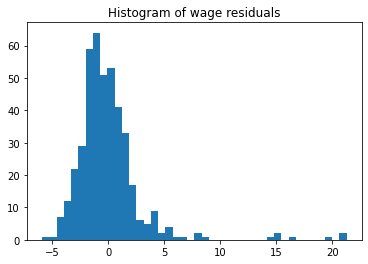

In [ ]:
u=results.resid
# plotting the histogram 
plt.hist(u, "auto")
plt.title('Histogram of wage residuals')
plt.show()

#### We can observe that the histogram has a format close to the exponential distribution with the residuals generally contained between [-5,5] We can also note some outliers close to x=15 and x=20.

### 8. Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7

In [ ]:
# building the linear model for lwage
y = df['lwage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

In [ ]:
# regression using statsmodel
model=sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        22:40:44   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.055      -0.806       0.008
x1             0.0353      0.070      0.503      0.616      -0.103       0.173
x2             0.1022      0.015      6.771      0.000       0.073       0.132
x3             0.0155      0.004      3.452      0.001       0.007       0.024
x4             0.0049      0.003      1.466      0.143      -0.002       0.011
x5            -0.0453      0.085     -0.531      0.596      -0.213       0.122
x6            -0.0117      0.027     -0.434      0.664      -0.065       0.041
==============================================================================
Omnibus:                       79.542   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.193
Skew:                          -0.795   Prob(JB):                     4.33e-63
Kurtosis:                       6.685   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

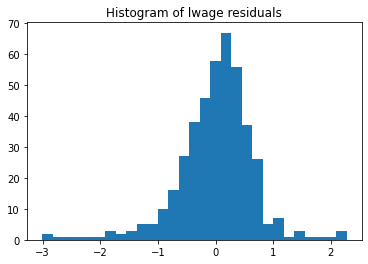

In [ ]:
# plotting the histogram 
u = results.resid
plt.hist(u, "auto")
plt.title('Histogram of lwage residuals')
plt.show()

#### By applying log we can observe that the histogram is more close to a normal distribution with the residuals generally contained between [-1,1]. That difference between formats (exponencial for wage) is due to the fact that by applying log we can eliminate the outliers. Therefore,it  is more reasonable to use log(wage) for the following analyses.

## 9. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values. 

Testing if $\beta_nwifeinc = 0$

By the OLS regression in question 8 we can see that the p-value for nwifeinc is 0.143.

1) If we use a significance level of α = 0.01 (1%), we would fail
   to reject the null hypothesis of our hypothesis 
   test because this p-value is not less than 0.01.
   
2) If we use a significance level of α = 0.05 (5%), we would fail
   to reject the null hypothesis of our hypothesis 
   test because this p-value is not less than 0.05.
   
3) If we use a significance level of α = 0.1 (10%), we would fail
   to reject the null hypothesis of our hypothesis 
   test because this p-value is not less than 0.1.
  
Conclusion: We fail to reject the hypothesis of non significance of our hypothesis test for all 1%, 5% and 10% significance levels.

## 10. Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

Test: $$ H0: \beta_{nwifeinc} = 0.01 $$

In [ ]:
y = df['lwage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

beta = np.linalg.inv(X.T@X)@X.T@y 
u=y-X@beta
n,k=np.shape(X)
sig2=u.T@u/(n-k)
Var=sig2*np.linalg.inv(X.T @ X)
std=np.sqrt(np.diag(Var))

test = (beta[4] - 0.01)/std[4]
p_value = 2*(1 - t.sf(test,n-k-1))

print('p-value: ', p_value)

p-value:  0.12519597367688995


#### We fail to reject the null hypothesis of our hypothesis test for 5% significance level because p-value (0.12519597367688995) in not less than 0.05

## 11. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

Test: $$ H0 : \beta_{nwifeinc} = 0.01, \beta_{city} = 0.05 $$

In [ ]:
### On doit calculer la somme des carr´es des erreurs du mod`ele non contraint.

y = df['lwage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
u=results.resid
SSR0 = u.T@u

In [ ]:
### Ensuit on doit calculer la somme des carr´es des erreurs du mod`ele contraint.

X0=X
y = df['lwage'] - 0.01*nwifeinc - 0.05*city
X=np.column_stack((const, educ, exper, kidslt6, kidsge6 ))
model=sm.OLS(y,X)
results = model.fit()
u=results.resid
SSR1=u.T@u

In [ ]:
### Calcul de la statistique de Fisher F

q = 2
n,k=np.shape(X0)
F=((SSR1-SSR0)/q)/(SSR0/(n-k))
p_value = f.sf(F,q,n-k)
print('p-value: ', p_value)

p-value:  0.2637267136252716


#### We fail to reject the null hypothesis of our hypothesis test for 5% significance level because p-value (0.2637267136252716) is not less than 0.05.

## 12. Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez

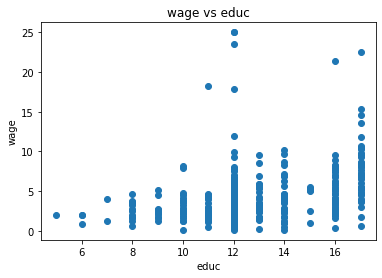

In [ ]:
plt.scatter(educ,wage)
plt.xlabel('educ')
plt.ylabel('wage')
plt.title('wage vs educ')
plt.show()

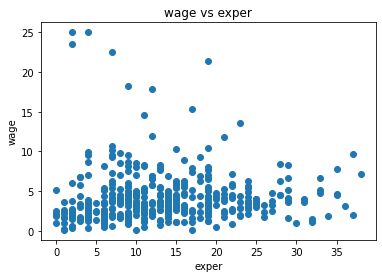

In [ ]:
plt.scatter(exper,wage)
plt.xlabel('exper')
plt.ylabel('wage')
plt.title('wage vs exper')
plt.show()

#### By looking at the graphics we can observe that a bigger exper is not that relevant to provide a bigger wage. In relation to educ we can see more consistency in bigger levels of education generating bigger wages. We can confirm that by the correlations below. Exper has correlation close to zero (0.0549915) while educ has a bigger correlation of 0.34195443

In [ ]:
np.corrcoef(exper,wage)

array([[1.       , 0.0549915],
       [0.0549915, 1.       ]])

In [ ]:
np.corrcoef(educ,wage)

array([[1.        , 0.34195443],
       [0.34195443, 1.        ]])

## 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

Test: $$ H0 : \beta_{kidsge6} = \beta_{kidslt6} $$ or $$ H0 : \beta_{kidsge6} - \beta_{kidslt6} = 0 $$

Initial model:

wage = $ \beta_{city}*city$ + $\beta_{educ}*educ$ + $\beta_{exper}*exper$ + $\beta_{nwifeinc}*nwifeinc$ + $\beta_{kidslt6}*kidslt6$ + $\beta_{kidsge6}*kidsge6$ + $\beta_{const}$

Defining $\theta = \beta_{kidsge6} - \beta_{kidslt6}$

We can write

$\theta +  \beta_{kidslt6} = \beta_{kidsge6}$

We get the model

wage = $ \beta_{city}*city$ + $\beta_{educ}*educ$ + $\beta_{exper}*exper$ + $\beta_{nwifeinc}*nwifeinc$ + $\beta_{kidslt6}*kidslt6$ + $(\theta +  \beta_{kidslt6})*kidsge6$ + $\beta_{const}$

Which is:

wage = $\theta*kidsge6$ + $ \beta_{city}*city$ + $\beta_{educ}*educ$ + $\beta_{exper}*exper$ + $\beta_{nwifeinc}*nwifeinc$ + $\beta_{kidslt6}*(kidslt6 + kidsge6) $ + $\beta_{const}$

Now, we test it for the significance of $\theta$, which is the same of testing if $\theta = 0$

In [ ]:
# Reconstructing the model

y = df['lwage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']

X = np.column_stack((const, kidsge6, city, educ, exper, nwifeinc, kidslt6 + kidsge6))
model=sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        22:40:44   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.055      -0.806       0.008
x1             0.0336      0.090      0.372      0.710      -0.144       0.211
x2             0.0353      0.070      0.503      0.616      -0.103       0.173
x3             0.1022      0.015      6.771      0.000       0.073       0.132
x4             0.0155      0.004      3.452      0.001       0.007       0.024
x5             0.0049      0.003      1.466      0.143      -0.002       0.011
x6            -0.0453      0.085     -0.531      0.596      -0.213       0.122
==============================================================================
Omnibus:                       79.542   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.193
Skew:                          -0.795   Prob(JB):                     4.33e-63
Kurtosis:                       6.685   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We fail to reject the null hypothesis of our hypothesis test for 5% significance level because p-value for $\theta$ (0.710) is not less than 0.05.

## 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter

Test the homokesdacity hypothesis using the regression of u2 depending on the model variables.
We must test the global significance of the following regression $u^2 = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_6x_6$.

Which means testing:
$$H_0: \theta_0 = \theta_1 = \theta_2 = \theta_3 = \theta_4  = \theta_5  = \theta_6 = 0$$

In [ ]:
# model from question 7

y = df['wage']
s = np.shape(y)
const = np.ones(s)
city = df['city']
educ = df['educ']
exper = df['exper']
nwifeinc = df['nwifeinc']
kidslt6 = df['kidslt6']
kidsge6 = df['kidsge6']
X0 = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X0)
results = model.fit()

# test
u=results.resid
u2=u**2
y=u2
model=sm.OLS(y, X0)
n,k = np.shape(X0)
results = model.fit()
print(results.summary())
u0 = results.resid
SSR0 = u0.T@u0

X1 = const.T
model = sm.OLS(y, X1)
results = model.fit()
u1 = results.resid
SSR1 = u1.T@u1

q = 6
F = ((SSR1 - SSR0)/q)/(SSR0/(n-k))
p_value = f.sf(F,q,n-k)
print('p-value: ', p_value)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.148
Time:                        22:40:44   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

#### Conclusion: We fail to reject the null hypothesis (homokesdacity hypothesis) of our hypothesis test because the p-value(0.14766133314492383) is not less than 0.05. 

#### One way of reducing heteroskedasticity is applying log.

## 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans. Donnez les p-valeurs

Non-significance test

Fist part:

In [ ]:
# femmes qui on plus de 43 ans

df_age = df[df['age'] > 43]

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print('age > 43: F: ', results.fvalue)
print('age > 43: p-value: ', results.f_pvalue)

age > 43: F:  5.925214111863349
age > 43: p-value:  1.1539982150709293e-05


In [ ]:
# femmes avec age <= 43

df_age = df[df['age'] <= 43]

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print('age <= 43: F: ', results.fvalue)
print('age <= 43: p-value: ', results.f_pvalue)

age <= 43: F:  7.888373058223937
age <= 43: p-value:  9.367865571690298e-08


#### In both cases we can observe that p-value < 0.05 and therefore we can reject the hypothesis that every coeficient is null. Thus, the regression is meaningful.

Second part:

Since there is no women with age less than 30 years, we interpreted the question as
- women with age <= 30
- women with 30  < age <= 43
- women with age > 43

In [ ]:
# womans with age <= 30
df_age = df[df['age'] <= 30]

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print('age <= 30: F: ', results.fvalue)
print('age <= 30: p-value: ', results.f_pvalue)

age <= 30: F:  2.760899837232829
age <= 30: p-value:  0.06343308213163089


In [ ]:
# womans with 30 < age <= 43
df_age = df[(df['age'] > 30) & (df['age'] <= 43)]

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print('30 < age <= 43: F: ', results.fvalue)
print('30 < age <= 43: p-value: ', results.f_pvalue)

30 < age <= 43: F:  6.321130025737236
30 < age <= 43: p-value:  3.837408744014238e-06


In [ ]:
# womans with age > 43
df_age = df[df['age'] > 43]

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6))

model=sm.OLS(y,X)
results = model.fit()
print('age > 43: F: ', results.fvalue)
print('age > 43: p-value: ', results.f_pvalue)

age > 43: F:  5.925214111863349
age > 43: p-value:  1.1539982150709293e-05


#### By looking at the p-values the only one in which we fail to reject the the null hypothesis is "women with age <= 30". Therefore, this regression does not make sense but the others do.

### 16. Construire les variables binaires correspondant à l’âge des femmes de la question 15. Refaire la question 8 en ajoutant ces variables et en utilisant comme référence les femmes qui ont moins de 30 ans. Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs.

Applying the non-significance test for each case:

In [ ]:
#### AGE > 43

df_age = df.copy()
df_age['age_condition'] = df_age.age.apply(lambda age: 1 if age>43 else 0)

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
age = df_age['age_condition']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6, age))

model=sm.OLS(y,X)
results = model.fit()
print('age > 43: F: ', results.fvalue)
print('age > 43: p-value: ', results.f_pvalue)

results.summary()

age > 43: F:  11.656993203392469
age > 43: p-value:  1.4301637214559697e-13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.43e-13
Time:                        22:40:44   Log-Likelihood:                -430.11
No. Observations:                 428   AIC:                             876.2
Df Residuals:                     420   BIC:                             908.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3277      0.210     -1.562      0.119      -0.740       0.085
x1             0.0461      0.070      0.657      0.511      -0.092       0.184
x2             0.0993      0.015      6.559      0.000       0.070       0.129
x3             0.0181      0.005      3.866      0.000       0.009       0.027
x4             0.0060      0.003      1.775      0.077      -0.001       0.013
x5            -0.0775      0.087     -0.893      0.372      -0.248       0.093
x6            -0.0306      0.029     -1.069      0.286      -0.087       0.026
x7            -0.1512      0.080     -1.891      0.059      -0.308       0.006
==============================================================================
Omnibus:                       76.595   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.732
Skew:                          -0.758   Prob(JB):                     1.10e-61
Kurtosis:                       6.667   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### AGE <= 43

df_age = df.copy()
df_age['age_condition'] = df_age.age.apply(lambda age: 1 if age<=43 else 0)

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
age = df_age['age_condition']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6, age))

model=sm.OLS(y,X)
results = model.fit()
print('age <= 43: F: ', results.fvalue)
print('age <= 43: p-value: ', results.f_pvalue)

results.summary()

age <= 43: F:  11.656993203392469
age <= 43: p-value:  1.4301637214559697e-13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.43e-13
Time:                        22:40:44   Log-Likelihood:                -430.11
No. Observations:                 428   AIC:                             876.2
Df Residuals:                     420   BIC:                             908.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4789      0.211     -2.273      0.024      -0.893      -0.065
x1             0.0461      0.070      0.657      0.511      -0.092       0.184
x2             0.0993      0.015      6.559      0.000       0.070       0.129
x3             0.0181      0.005      3.866      0.000       0.009       0.027
x4             0.0060      0.003      1.775      0.077      -0.001       0.013
x5            -0.0775      0.087     -0.893      0.372      -0.248       0.093
x6            -0.0306      0.029     -1.069      0.286      -0.087       0.026
x7             0.1512      0.080      1.891      0.059      -0.006       0.308
==============================================================================
Omnibus:                       76.595   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.732
Skew:                          -0.758   Prob(JB):                     1.10e-61
Kurtosis:                       6.667   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### AGE <=30

df_age = df.copy()
df_age['age_condition'] = df_age.age.apply(lambda age: 1 if age<=30 else 0)

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
age = df_age['age_condition']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6, age))

model=sm.OLS(y,X)
results = model.fit()
print('age <= 30: F: ', results.fvalue)
print('age <= 30: p-value: ', results.f_pvalue)

results.summary()

age <= 30: F:  11.302427601632251
age <= 30: p-value:  3.806005688608665e-13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     11.30
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.81e-13
Time:                        22:40:44   Log-Likelihood:                -431.17
No. Observations:                 428   AIC:                             878.3
Df Residuals:                     420   BIC:                             910.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4304      0.209     -2.064      0.040      -0.840      -0.020
x1             0.0364      0.070      0.519      0.604      -0.101       0.174
x2             0.1024      0.015      6.781      0.000       0.073       0.132
x3             0.0163      0.005      3.598      0.000       0.007       0.025
x4             0.0052      0.003      1.566      0.118      -0.001       0.012
x5            -0.0591      0.086     -0.687      0.492      -0.228       0.110
x6            -0.0079      0.027     -0.291      0.771      -0.061       0.045
x7             0.1966      0.162      1.217      0.224      -0.121       0.514
==============================================================================
Omnibus:                       77.669   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.451
Skew:                          -0.771   Prob(JB):                     2.82e-62
Kurtosis:                       6.677   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### AGE > 30 and AGE <= 43

df_age = df.copy()
df_age['age_condition'] = df_age.age.apply(lambda age: 1 if (age>30)&(age<=43) else 0)

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
age = df_age['age_condition']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6, age))

model=sm.OLS(y,X)
results = model.fit()
print('30 < age <= 43: F: ', results.fvalue)
print('30 < age <= 43: p-value: ', results.f_pvalue)

results.summary()

30 < age <= 43: F:  11.308628133859576
30 < age <= 43: p-value:  3.7413186424383416e-13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     11.31
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.74e-13
Time:                        22:40:44   Log-Likelihood:                -431.15
No. Observations:                 428   AIC:                             878.3
Df Residuals:                     420   BIC:                             910.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4339      0.209     -2.078      0.038      -0.844      -0.023
x1             0.0415      0.070      0.591      0.555      -0.097       0.180
x2             0.1003      0.015      6.614      0.000       0.071       0.130
x3             0.0167      0.005      3.640      0.000       0.008       0.026
x4             0.0054      0.003      1.611      0.108      -0.001       0.012
x5            -0.0588      0.086     -0.684      0.494      -0.228       0.110
x6            -0.0254      0.029     -0.873      0.383      -0.083       0.032
x7             0.0949      0.077      1.232      0.219      -0.056       0.246
==============================================================================
Omnibus:                       78.466   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.942
Skew:                          -0.782   Prob(JB):                     2.20e-62
Kurtosis:                       6.671   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### AGE > 43

df_age = df.copy()
df_age['age_condition'] = df_age.age.apply(lambda age: 1 if age>43 else 0)

y = df_age['lwage']
s = np.shape(y)
const = np.ones(s)
city = df_age['city']
educ = df_age['educ']
exper = df_age['exper']
nwifeinc = df_age['nwifeinc']
kidslt6 = df_age['kidslt6']
kidsge6 = df_age['kidsge6']
age = df_age['age_condition']
X = np.column_stack((const, city, educ, exper, nwifeinc, kidslt6, kidsge6, age))

model=sm.OLS(y,X)
results = model.fit()
print('age > 43: F: ', results.fvalue)
print('age > 43: p-value: ', results.f_pvalue)

results.summary()

age > 43: F:  11.656993203392469
age > 43: p-value:  1.4301637214559697e-13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.66
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.43e-13
Time:                        22:40:44   Log-Likelihood:                -430.11
No. Observations:                 428   AIC:                             876.2
Df Residuals:                     420   BIC:                             908.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3277      0.210     -1.562      0.119      -0.740       0.085
x1             0.0461      0.070      0.657      0.511      -0.092       0.184
x2             0.0993      0.015      6.559      0.000       0.070       0.129
x3             0.0181      0.005      3.866      0.000       0.009       0.027
x4             0.0060      0.003      1.775      0.077      -0.001       0.013
x5            -0.0775      0.087     -0.893      0.372      -0.248       0.093
x6            -0.0306      0.029     -1.069      0.286      -0.087       0.026
x7            -0.1512      0.080     -1.891      0.059      -0.308       0.006
==============================================================================
Omnibus:                       76.595   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.732
Skew:                          -0.758   Prob(JB):                     1.10e-61
Kurtosis:                       6.667   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can observe that p-value < 0.05 for every non-significance test applied, therefore we can reject the null hypothesis that every coefficient is zero.